# Coding Assignment: Rocket

The equations of motion for a rocket in purely vertical flight are given by

$$
\begin{cases}
\frac{dh}{dt} = v\\
(m_s+m_p) \frac{dv}{dt} = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{cases}
$$

$h$ is the altitude of the rocket

$m_s = 50kg$ is the weight of the rocket shell

$g = 9.81 \frac{m}{s^2}$

$\rho = 1.091 \frac{kg}{m^3}$ is the average air density (assumed constant throughout flight)

$A = \pi r^2$ is the maximum cross sectional area of the rocket, where $r = 0.5 m$

$v_e = 350 \frac{m}{s}$ is the exhaust speed

$C_D = 0.21 $ is the drag coefficient

$m_{po} = 150 kg$ at time $t = 0$ is the initial weight of the rocket propellant

The mass of the remaining propellant is given by:

$$m_p = m_{po} - \int^t_0 \dot{m}_p d\tau$$

where $\dot{m}_p$ is the time-varying burn rate given by the following figure:

Propellant Burn Rate

<img src="figures/burn_rate.png" width="600px">

that is,

$$
\begin{equation}
    \dot{m}_p \left( t \right) =
    \begin{cases}
        20 & \quad \text{if} \quad t < 4 \\
        0 & \quad \text{otherwise}
    \end{cases}
\end{equation}
$$

Using RK2 (midpoint) technique with a time-step size of $\Delta t=0.05s$, implement a code (in this notebook) to calculate the altitude and velocity of the rocket from launch until crash down.

_Hint:_ To compute the mass of the remaining propellant at a given time $t$, you can use the function `integrate.quad()` from the SciPy package.
(Check the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) to understand how to use it.)

---

## Implement your solution (40 points)

Implement your solution in this section.
You can use as many code cells as you want.

In [1]:
# Import your libraries.

# YOUR CODE HERE
import numpy as np
from matplotlib import pyplot
%matplotlib inline

#### Create the time grid

In [41]:
# YOUR CODE HERE

T = 30.0  # length of the time-interval
dt = 0.05  # time-step size
N = int(T/dt) +1 # number of time steps
t = np.linspace(0.0, T, num=N)  # time grid

#### Set given values/coefficients

In [42]:
h_o=0 #initial height [m]
m_s=50 #weight of rocket [kg]
g=9.81 #gravitational force [m/s^2]
rho=1.091 #density of air [kg/m^3]
r=0.5 #max radius of rocket [m]
A=(np.pi)*(r**2) #xc Area of rocket [m^2]
v_e = 350 #exhaust speed [m/s]
C_D = 0.21 #drag coeff
m_po=150 #initial (t=0) weight of propellent

#### Mass equation

In [43]:
m_p_dot=np.zeros_like(t)
for i in range(len(m_p_dot)):
    if (t[i]<=4):
        m_p_dot[i]=20
    else:
        m_p_dot[i]=0
m_p=np.zeros_like(t)
for i in range(len(m_p)):
    if (t[i]<=4):
        m_p[i]=m_po-(t[i]*20)
    else:
        m_p[i]=0
mass=np.zeros_like(t)
for i in range(len(t)):
    if (t[i]<=4):
        mass[i]=(m_s+150-t[i]*m_p_dot[i])
    else:
        mass[i]=(120)

In [44]:
type(mass)

numpy.ndarray

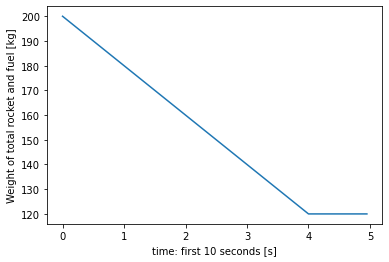

In [45]:
pyplot.plot(t[:100],mass[:100])
pyplot.xlabel('time: first 10 seconds [s]')
pyplot.ylabel('Weight of total rocket and fuel [kg]');

here we can visualise the rocket decreasing weight from 150 kg propellant and 50 kg shell as it expells 'some' the 150 kg of propelent in the first 4 seconds leaving only the shell (50 kg) and leftover propellant (70 kg)

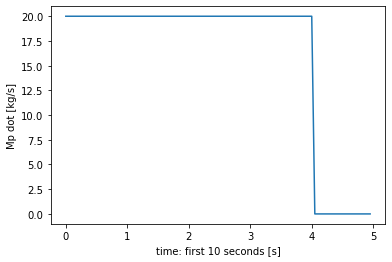

In [46]:
pyplot.plot(t[:100],m_p_dot[:100])
pyplot.xlabel('time: first 10 seconds [s]')
pyplot.ylabel('Mp dot [kg/s]');

#### Define RK2 function

In [47]:
def rk2_step(u, rhs, dt,*args):
    '''
    Update a state to the next time increment using modified Euler's method.
    
    Arguments:
    state : array of dependent variables
    rhs   : function that computes the RHS of the DiffEq
    dt    : float, time increment
    
    Returns:
    next_state : array, updated after one time increment'''
    u_star = u + (rhs(u,*args)*(dt*0.5))    
    u_new = u + (rhs(u_star,*args)*dt)
 
    return u_new

#### Write equation of motion

In [48]:
def rocket(u,i,mass):
    '''Compute the right hand side of the diff eq
    
    Arguments:
    state    : array of state variables, (h,v)
    
    Returns  :
    derivs   : array of derivatives (v,a)  
    '''
    derivs =np.array([u[1], -g+((m_p_dot[i]*v_e)/(mass))-(0.5/mass)*rho*u[1]*abs(u[1])*A*C_D])
    return derivs

#### Initialise state of rocket array

In [49]:
sol=np.zeros([N,2])#numerical solution [h,v]
sol[0,0]=h_o #initial hieght = 0 [m]
sol[0,1]=0 #initial velocity =0 [m/s]

In [50]:
for i in range(N-1):
    sol[i+1] = rk2_step(sol[i],rocket,dt,i,mass[i])
#finding the numerical solutions using rk2 step and right hand side of rocket

In [51]:
for i in range(N):
    if (sol[i,0]<0):
        sol[i,0]=0
        sol[i,1]=0
#deletes false negative altitude solutions

In [52]:
print(sol[:20])

[[ 0.          0.        ]
 [ 0.0314875   1.25949108]
 [ 0.12616851  2.52770399]
 [ 0.2844795   3.80465299]
 [ 0.50685763  5.09035103]
 [ 0.79374067  6.38480973]
 [ 1.14556694  7.68803929]
 [ 1.56277523  9.0000485 ]
 [ 2.04580474 10.32084468]
 [ 2.595095   11.65043362]
 [ 3.21108578 12.98881958]
 [ 3.89421702 14.33600518]
 [ 4.64492878 15.69199143]
 [ 5.46366111 17.05677763]
 [ 6.35085396 18.43036133]
 [ 7.30694715 19.81273831]
 [ 8.33238023 21.20390253]
 [ 9.4275924  22.60384605]
 [10.59302241 24.01255901]
 [11.82910848 25.43002956]]


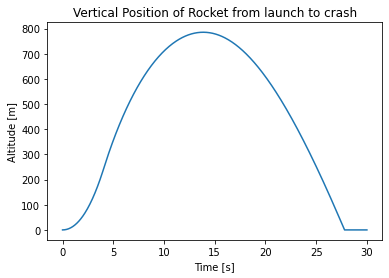

In [53]:
pyplot.plot(t[:],sol[:,0])
pyplot.xlabel('Time [s]')
pyplot.ylabel('Altitude [m]')
pyplot.title('Vertical Position of Rocket from launch to crash');

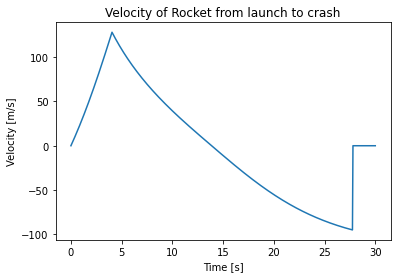

In [54]:
pyplot.plot(t[:],sol[:,1])
pyplot.xlabel('Time [s]')
pyplot.ylabel('Velocity [m/s]')
pyplot.title('Velocity of Rocket from launch to crash');

---

## Assessment (60 points)

Answer questions in this section.

Do not try to delete or modify empty code cells that are already present.
For each question, provide your answer in the cell **just above** the empty cell.
(This empty cell contains hidden tests to assert the correctness of your answer and cannot be deleted.)
Pay attention to the name of the variables we ask you to create to store computed values; if the name of the variable is misspelled, the test will fail.

In [55]:
# Import module to check answers.
import mooc

**Q1. (10 points)** Using Matplotlib, plot the history of the altitude and velocity of the rocket over time.

Don't forget to include axis labels and a legend, if necessary, to your Matplotlib figure.

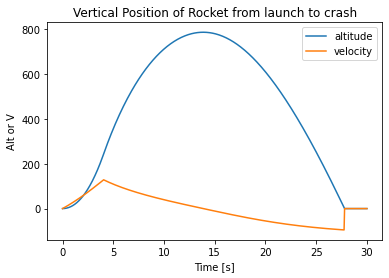

In [56]:
# YOUR CODE HERE
pyplot.plot(t[:],sol[:,0],label='altitude')
pyplot.plot(t[:],sol[:,1],label='velocity')
pyplot.xlabel('Time [s]')
pyplot.ylabel('Alt or V')
pyplot.title('Vertical Position of Rocket from launch to crash')
pyplot.legend(loc='best');

**Q2. (5 points)** At time $t=15.2s$, what is the mass (in kg) of rocket propellant remaining in the rocket? 

_Instructions:_

* Store the value of the remaining propellant using a variable called `m_p`.
You can call the function `mooc.check('hw1_answer1', m_p)` to check you got the correct answer. The function will print `'Good job!'` if you got it right, `'Try again!'` otherwise.

In [57]:
h=sol[:,0]
v=sol[:,1]

In [58]:
# YOUR CODE HERE
t[304]
m_p=mass[304]-50 #total mass at t=15.2 -50 kg shell
mooc.check('hw1_answer1',m_p)

[hw1_answer1] Good job!


**Q3. (15 points)** What is the maximum speed of the rocket in $\frac{m}{s}$? At what time does this occur (in seconds)? What is the altitude at this time (in meters)?

_Instructions:_

* Store the maximum speed in the variable `vmax`, check your answer with `mooc.check('hw1_answer2', vmax)`.
* Store the time in `t_vmax`, check your answer with `mooc.check('hw1_answer3', t_vmax)`.
* Store the altitude in the variable `h_vmax`, check your answer with `mooc.check('hw1_answer4', h_vmax)`.

In [59]:
# YOUR CODE HERE
vmax=np.max(v)
print(v[81])
print(vmax)
mooc.check('hw1_answer2',vmax)

128.11599966369317
128.11599966369317
[hw1_answer2] Try again!


In [60]:
for i in range(N):
    if (v[i]==vmax):
        t_vmax=t[i-1]
        break
print(t_vmax)
mooc.check('hw1_answer3',t_vmax)

4.0
[hw1_answer3] Good job!


In [24]:
for i in range(N):
    if (v[i]==vmax):
        h_vmax=h[i]
        break
mooc.check('hw1_answer4',h_vmax)

[hw1_answer4] Try again!


**Q4. (10 points)** What is the rocket's maximum altitude during flight (in meters)? At what time (in seconds) does this occur?

_Instructions:_

* Store the maximum altitude in the variable `hmax`, check your answer with `mooc.check('hw1_answer5', hmax)`.
* Store the time in the variable `t_hmax`, check your answer with `mooc.check('hw1_answer6', t_hmax)`.

In [40]:
# YOUR CODE HERE
hmax=np.max(h)
mooc.check('hw1_answer5', hmax)

[hw1_answer5] Try again!


In [37]:
for i in range(N):
    if (h[i]==hmax):
        t_hmax=t[i-2]
        print(i)
        break
mooc.check('hw1_answer6', t_hmax)
print(t_hmax)

277
[hw1_answer6] Good job!
13.75


**Q5. (20 points)** At what time (in seconds) does the rocket impact the ground? What is the velocity of the rocket (in $\frac{m}{s}$) at time of impact?

The time and velocity of the impact should be linearly interpolated at altitude $h = 0$.

_Instructions:_

* Store the time of impact in the variable `t_impact`, check your answer with `mooc.check('hw1_answer7', t_impact)`.
* Store the impact velocity in the variable `v_impact`, check your answer with `mooc.check('hw1_answer8', v_impact)`.

In [27]:
# YOUR CODE HERE
for i in range(N-1):
    if (h[i+1]==0):
        t_impact=t[i+1]
        break

mooc.check('hw1_answer7',t_impact)

[hw1_answer7] Try again!


---

## Derivation of the rocket equations

In case you are kind of confused about the rocket equations, here we show how to get to them. 

Newton's second law states that the acceleration of the vehicle times its mass is equal to all the forces acting on it. Therefore,

\begin{equation}
(m_s + m_p)\frac{d\bf{v}}{dt}=\sum {\bf F}.
\end{equation}
In the above formula we have assumed that the propellant inside the rocket and the rocket move at the same velocity (in other words, their relative velocity is negligible). 

Two of the external forces acting on the rocket are,

\begin{align}
{\bf F}_g&= (m_s+m_p)\bf{g} \quad (\rm{Gravity}),\\
{\bf F}_d&= - \frac{1}{2} \rho_a \mathbf{v} |\mathbf{v}| A  C_D \quad (\rm{Drag}).
\end{align}

We also need to consider the force resulting from the ejection of the propellant. During an interval $dt$, the engine of the rocket ejects downwards a mass of propellant given by $\dot m_p dt$. Relative to the rocket, the speed of the ejected burning gas is assumed constant and equal to $v_e$ (the exhaust speed). The momentum variation induced on the exhaust gas by the engine during that interval is therefore, $d{\bf p}_{gas} = \dot m_p {\bf v}_e dt$. Again using Newton's second law we conclude that the force applied by the rocket on the gas is,

\begin{align}
{\bf F}_{rocket\rightarrow gas} = \frac{d{\bf p}_{gas}}{dt} = \dot m_p {\bf v}_e
\end{align}

Using Newton's third law (|action| = |reaction|), the force exerted by the exhaust gas on the rocket is then,

\begin{align}
{\bf F}_{gas\rightarrow rocket} = -{\bf F}_{rocket\rightarrow gas} = -\dot m_p {\bf v}_e
\end{align}

If we collect all the forces acting on the rocket we finally have:

\begin{align}
(m_s + m_p)\frac{d\bf{v}}{dt}=(m_s+m_p){\bf g}- \frac{1}{2} \rho_a \mathbf{v} |v| A  C_D -\dot m_p {\bf v}_e
\end{align}

